# Introduction to PyTorch

This tutorial shows the basics of PyTorch library.

We design simple Neural Networks for classification task on MNIST dataset.

Necessary knowledge you can find in PyTorch documentation:

https://pytorch.org/docs/stable/index.html

and tutorials:

https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

In [83]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


1. PyTorch is based on tensor operations.
Please create tensors in the following ways:
- directly with python list
- from `numpy`
- with random values (initialize generator with your academic id / student number from USOS system)
- linear space in range from -5 to 15 and number of elements.
- 3 tensors with indices of each element of grid for dimensions: 1, 2, 3 (without 0-th - basically is a batch dim)

For all cases use `shape = (1, 3, 28, 28)`.

For display use `print` function.

In [84]:
! pip3 install torch torchvision

In [85]:
import torch
import numpy as np
# # For all cases use `shape = (1, 3, 28, 28)`. create tensors in the following ways:
# - directly with python list
t = torch.tensor([[[[0] * 28] * 28] * 3] * 1)
print(t.shape)
print(t)

# - from `numpy`
t = torch.from_numpy(np.zeros((1, 3, 28, 28)))
print(t.shape)
print(t)

# - with random values (initialize generator with your academic id - 303788
generator = torch.Generator().manual_seed(303788)
t = torch.rand((1, 3, 28, 28), generator=generator)
print(t.shape)
print(t)

# - linear space in range from -5 to 15 and number of elements - shape (1, 3, 28, 28)
t = torch.linspace(-5, 15, 1 * 3 * 28 * 28).reshape((1, 3, 28, 28))
print(t.shape)
print(t)

# - 3 tensors with indices of each element of grid for dimensions: 1, 2, 3 (without 0-th - basically is a batch dim)
# grid shape excluding batch dim: 3, 28, 28
grid_shape = (3, 28, 28)
indicies_0 = torch.arange(grid_shape[0]).reshape((grid_shape[0], 1, 1))
print(indicies_0.shape)
print(indicies_0)
indicies_1 = torch.arange(grid_shape[1]).reshape((1, grid_shape[1], 1))
print(indicies_1.shape)
print(indicies_1)
indicies_2 = torch.arange(grid_shape[2]).reshape((1, 1, grid_shape[2]))
print(indicies_2.shape)
print(indicies_2)


torch.Size([1, 3, 28, 28])
tensor([[[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]]])
torch.Size([1, 3, 28, 28])
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.

2. PyTorch allow for applying GPU for computations.
Check is gpu (CUDA) is available, then use it as `device`, else use `'cpu'`.

In [86]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


3. To train a networks we need a dataset.

Please download `MINIST` dataset with `torchvision.dataset`.

For any kind of ML task, validation or testing is required.

So, create train and test datasets.

For train dataset apply also augmentation transforms, crop, translation and rotation.

You can try to apply different transforms.

For both apply ToTensor.

Next, pack datasets into `DataLoader`s with batch size of 64.
Use variables with names: `train_loader` and `test_loader`.

Next display sizes of datasets, shapes of elements and display few images and their labels.

Train dataset size: 60000


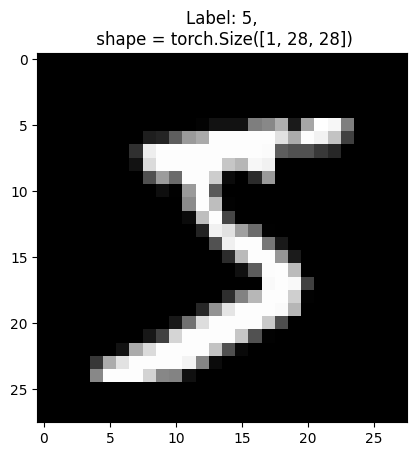

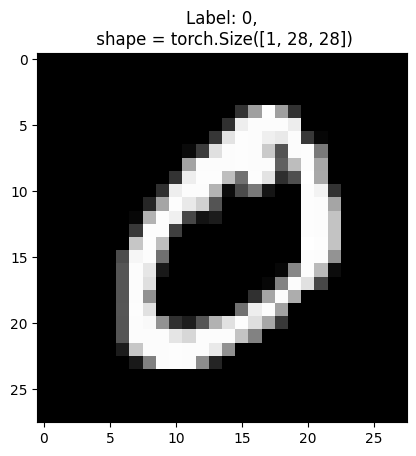

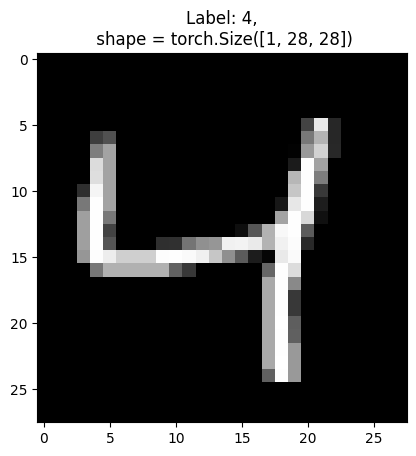

Test dataset size: 10000


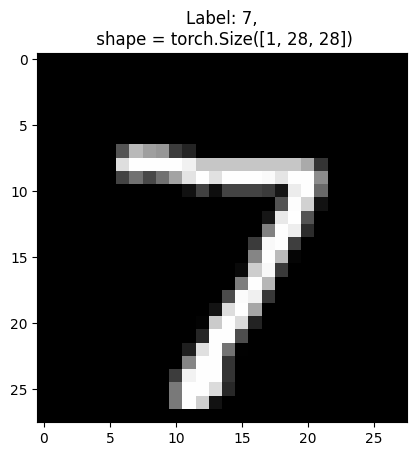

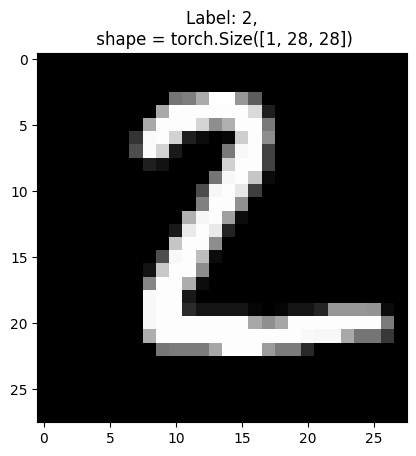

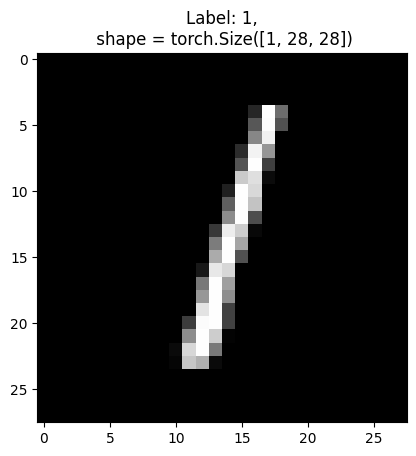

In [87]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

#image datasets
train_dataset = datasets.MNIST(root='data', train=True, download=True, transform=ToTensor())
test_dataset  = datasets.MNIST(root='data', train=False, download=True, transform=ToTensor())

batchsize = 64
#data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=batchsize, shuffle=True)
test_loader  = DataLoader(dataset=test_dataset, batch_size=batchsize, shuffle=False)

print(f"Train dataset size: {len(train_dataset)}")
for i in range(3):
    shape = train_dataset[i][0].shape
    image, label = train_dataset[i]
    plt.imshow(image.squeeze(0), cmap='gray')
    plt.title(f"Label: {label},\n shape = {shape}")
    plt.show()

print(f"Test dataset size: {len(test_dataset)}")
for i in range(3):
    shape = test_dataset[i][0].shape
    image, label = test_dataset[i]
    plt.imshow(image.squeeze(0), cmap='gray')
    plt.title(f"Label: {label},\n shape = {shape}")
    plt.show()


4. `*`Additionally, you can prepare analysis of datasets.

E.g. statistics like mean and variance of all elements, for each label.

Analysis can allow you for designing better network architecture.

In [88]:
# prepare analysis of datasets.
# E.g. statistics like mean and variance of all elements, for each label.
dataset_names = ['train', 'test']
for dataset_name, dataset in zip(dataset_names, [train_dataset, test_dataset]):
    print(f"Analysis of {dataset_name} dataset")
    for images, labels in train_loader:
        print(f"Images shape: {images.shape}")
        print(f"Labels shape: {labels.shape}")
        print(f"Images mean: {images.mean()}")
        print(f"Images std: {images.std()}")
        print(f"Labels mean: {labels.float().mean()}")
        print(f"Labels std: {labels.float().std()}")
        break

Analysis of train dataset
Images shape: torch.Size([64, 1, 28, 28])
Labels shape: torch.Size([64])
Images mean: 0.136639803647995
Images std: 0.31403735280036926
Labels mean: 3.921875
Labels std: 2.9239280223846436
Analysis of test dataset
Images shape: torch.Size([64, 1, 28, 28])
Labels shape: torch.Size([64])
Images mean: 0.1321709156036377
Images std: 0.3104514479637146
Labels mean: 4.34375
Labels std: 2.9071271419525146


5. When we have datasets, so we can create model for classification task.

Please, define class `MLP` as Multi Layer Perceptron

with two hidden fully connected layers with bias.

Class must inherits from `torch.nn.Module`.

Apply following configuration:

- first with 512 neurons,
- second with 512 neurons,
- output layer adjust to size of classification problem.

For `__init__` method add parameters: input_shape and output_size.

Don't forget about nonlinearities!

For hidden layers you can use `ReLU` module from `torch.nn`.

For output apply softmax function.

Network layer-by-layer processing define in `forward` method with argument as a network

input tensor - batch of images with shape (batch_size, channels, height, width).
(channels = 1, for gray scale images)

Instantiate model as `net` object.


In [ ]:
class MLP(torch.nn.Module):

    def __init__(self, input_shape, output_shape) -> None:
        super().__init__()

        input_size = np.prod(input_shape)

        # define layers
        self.fc1 = torch.nn.Linear(input_size, 512)
        self.relu1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(512, 512)
        self.relu2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(512, output_shape)
        self.softmax = torch.nn.Softmax(dim=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x

net = MLP(input_shape=(1, 28, 28), output_shape=10)

6. To train network we need to know 'how good or bad' results it gives.
Please, instantiate `torch.nn.CrossEntropyLoss` as `loss_fcn`.

In [89]:
loss_fcn = torch.nn.CrossEntropyLoss()

7. To score network define accuracy metric.
For network output you need to decide what is the final network answer.
(`argmax`).

`torch.no_grad()` prevents gradient requirement for computations inside method.

In [90]:
from abc import ABC, abstractmethod
from typing import Any


class BaseMetic(ABC):

    @abstractmethod
    def __call__(self, y_pred, y_ref) -> Any:
        raise NotImplementedError()


class AccuracyMetic(BaseMetic):

    def __init__(self) -> None:
        pass

    @torch.no_grad()
    def __call__(self, y_pred: torch.Tensor, y_ref: torch.Tensor) -> torch.Tensor:
        """
        :param y_pred: tensor of shape (batch_size, num_of_classes) type float
        :param y_ref: tensor with shape (batch_size,) and type Long
        :return: scalar tensor with accuracy metric for batch
        """
        predicted_labels = torch.argmax(y_pred, dim=1)
        correct = (predicted_labels == y_ref).sum().item()

        # scalar value - tensor
        score: torch.Tensor = torch.tensor(correct / len(y_ref))
        return score


metric = AccuracyMetic()

8. To change network parameters, we need optimizers object.
Instantiate `torch.optim.SGD` (with `net`work parameters) as `optimizer`.
Use learning rate = 0.001

UPDATE: 28 June
Try higher learning rate = 0.01

In [91]:
# optimizer = torch.optim.SGD(net.parameters(), lr=0.001)
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

9. Now define training / testing function:

In [75]:
from typing import Tuple
import tqdm


def train(model,
          data_generator,
          criterion,
          metric: BaseMetic,
          mode: str = 'test',
          optimizer: torch.optim.Optimizer = None,
          update_period: int = None,
          device = torch.device('cpu')) -> Tuple[torch.nn.Module, float, float]:

    # change model mode to train or test
    if mode == 'train':
        model.train()

    elif mode == 'test':
        model.eval()

    else:
        raise RuntimeError("Unsupported mode.")

    # move model to device
    model.to(device)

    # reset model parameters' gradients with optimizer
    if mode == 'train':
        optimizer.zero_grad()

    total_loss = 0.0
    total_accuracy = 0.0
    samples_num = 0

    # disable the progress and iterator (to enable set disable=False)
    for i, (X, y) in tqdm.tqdm(enumerate(data_generator), disable=True):
        # convert tensors to device
        X = X.to(device)
        y = y.to(device)

        # depending on mode use or not torch.no_grad() as 'with' block
        with torch.no_grad() if mode == 'test' else torch.enable_grad():
            # process by network
            y_pred = model(X)

            # calculate loss
            loss = criterion(y_pred, y)

        if mode == 'train':
            # designate gradient based on loss
            loss.backward()

        if mode == 'train' and (i+1) % update_period == 0:
            # update parameters with optimizer
            optimizer.step()
            optimizer.zero_grad()

        # calculate accuracy
        accuracy = metric(y_pred, y)

        total_loss += loss.item() * y_pred.shape[0]
        total_accuracy += accuracy.item() * y_pred.shape[0]
        samples_num += y_pred.shape[0]

    if samples_num == 0:
        return model, 0.0, 0.0

    return model, total_loss / samples_num, total_accuracy / samples_num

10. Prepare training loop (over epochs) function:
- adjust max number of epochs to achieve satisfactory results.
- `**` additionally, implement auto-detection of bias-variance tradeoff point, to break further training.
- `***` additionally, use learning rate scheduler.
- for each epoch collect losses and accuracies for both datasets.

In [76]:
 def train_loop(model,
               train_loader,
               test_loader,
               criterion,
               metric: BaseMetic,
               optimizer: torch.optim.Optimizer = None,
               num_epochs: int = 100,
               device=torch.device('cpu')):

    train_losses = []
    train_accuracies = []
    test_loses = []
    test_accuracies = []

    best_test_accuracy = 0.0

    early_stopping_counter = 0
    early_stopping_patience = 10

    #  threshold for auto-detection of bias-variance tradeoff
    tradeoff_threshold = 0.01

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='max', factor=0.1, patience=5, verbose=False)

    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")

        # train
        model, train_loss, train_accuracy = train(model,
                                                  train_loader,
                                                  criterion,
                                                  metric,
                                                  mode='train',
                                                  optimizer=optimizer,
                                                  update_period=1,
                                                  device=device)
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # test
        model, test_loss, test_accuracy = train(model,
                                                test_loader,
                                                criterion,
                                                metric,
                                                mode='test',
                                                device=device)
        test_loses.append(test_loss)
        test_accuracies.append(test_accuracy)

        # update scheduler
        scheduler.step(test_accuracy)

        # results
        print(f"Train loss: {train_loss:.4f}, Train accuracy: {train_accuracy:.4f}")
        print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")

        # auto-detection of bias-variance tradeoff
        if epoch > 0:
            if test_accuracy - best_test_accuracy < tradeoff_threshold:
                early_stopping_counter += 1
            else:
                early_stopping_counter = 0

        if early_stopping_counter >= early_stopping_patience:
            print(f"Early stopping on epoch {epoch+1}")
            break

        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            print(f"Best test accuracy: {best_test_accuracy:.4f}")

    return train_losses, train_accuracies, test_loses, test_accuracies

11. Display training history.

In [ ]:
train_losses, train_accuracies, test_losses, test_accuracies = train_loop(net,
                                                                          train_loader,
                                                                          test_loader,
                                                                          loss_fcn,
                                                                          metric,
                                                                          optimizer,
                                                                          num_epochs=20,
                                                                          device=device)
print(f"Final test accuracy: {test_accuracies[-1]}")
print(f"Final test loss: {test_losses[-1]}")
print(f"Final train accuracy: {train_accuracies[-1]}")
print(f"Final train loss: {train_losses[-1]}")

Epoch 1/20
Train loss: 2.3003, Train accuracy: 0.1426
Test loss: 2.2975, Test accuracy: 0.2054
Best test accuracy: 0.2054
Epoch 2/20
Train loss: 2.2935, Train accuracy: 0.2354
Test loss: 2.2874, Test accuracy: 0.2417
Best test accuracy: 0.2417
Epoch 3/20
Train loss: 2.2683, Train accuracy: 0.1900
Test loss: 2.2358, Test accuracy: 0.2247
Epoch 4/20
Train loss: 2.1848, Train accuracy: 0.3580
Test loss: 2.1044, Test accuracy: 0.4512
Best test accuracy: 0.4512
Epoch 5/20
Train loss: 2.0065, Train accuracy: 0.5142
Test loss: 1.9167, Test accuracy: 0.6392
Best test accuracy: 0.6392
Epoch 6/20
Train loss: 1.8688, Train accuracy: 0.6504
Test loss: 1.8316, Test accuracy: 0.6654
Best test accuracy: 0.6654
Epoch 7/20
Train loss: 1.8124, Train accuracy: 0.6803
Test loss: 1.7619, Test accuracy: 0.7870
Best test accuracy: 0.7870
Epoch 8/20
Train loss: 1.7340, Train accuracy: 0.7953
Test loss: 1.7015, Test accuracy: 0.8152
Best test accuracy: 0.8152
Epoch 9/20
Train loss: 1.6935, Train accuracy: 0.81

In [ ]:
# best test accuracy, best test loss, best train accuracy, best train loss
print(f"Best test accuracy: {max(test_accuracies)}")
print(f"Best test loss: {min(test_losses)}")
print(f"Best train accuracy: {max(train_accuracies)}")
print(f"Best train loss: {min(train_losses)}")

Best test accuracy: 0.846
Best test loss: 1.6234660104751586
Best train accuracy: 0.8417666666666667
Best train loss: 1.629333165105184


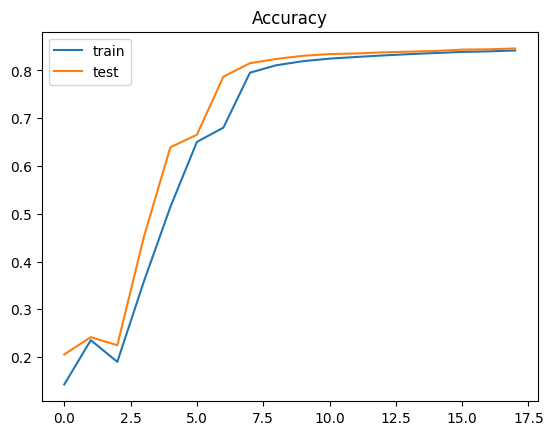

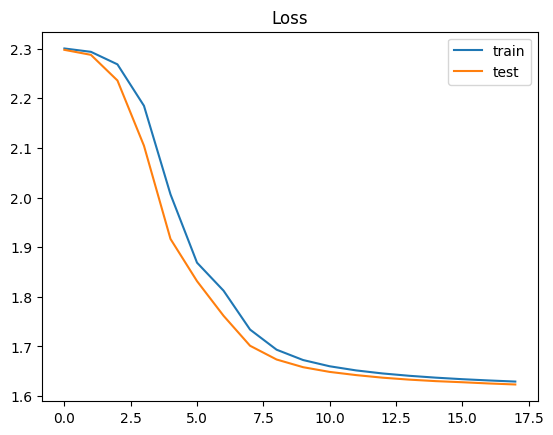

In [101]:
# plot accuracy test vs train and loss test vs train
import matplotlib.pyplot as plt
# plot accuracy
plt.title('Accuracy')
plt.plot(train_accuracies, label='train')
plt.plot(test_accuracies, label='test')
plt.legend()
plt.show()

# plot loss
plt.title('Loss')
plt.plot(train_losses, label='train')
plt.plot(test_losses, label='test')
plt.legend()
plt.show()

12. Save model and optimizer states to files.

Use method `state_dict` and function `torch.save`.

In [ ]:
import os
# create directory for saving model and optimizer states
if not os.path.exists('model'):
    os.makedirs('model')

net_path = os.path.join('model', 'net.pth')
optimizer_path = os.path.join('model', 'optimizer.pth')

torch.save(net.state_dict(), net_path)
torch.save(optimizer.state_dict(), optimizer_path)

13. Create new network with the same architecture and initialize it with saved weights.

`torch.load`, `load_state_dict`.

In [ ]:
# 13. Create new network with the same architecture and initialize it with saved weights.
net2 = MLP(input_shape=(1, 28, 28), output_shape=10)
saved_weights = torch.load(net_path)
net2.load_state_dict(saved_weights)

<All keys matched successfully>

14. Define your own model and train it.

Try achieve better results.

You can use different parameters, layers e.g.:
- conv2d
- maxpooling2d
- batch norm 2d
- and more...

Save weights to file.

In [97]:
class myMLP(torch.nn.Module):
    def __init__(self, input_shape, output_shape, num_filters, kernel_size) -> None:
        super().__init__()

        # define layers
        self.num_filters = num_filters
        self.kernel_size = kernel_size
        self.input_shape = input_shape

        self.conv1 =torch.nn.Conv2d(input_shape[0], num_filters, kernel_size, stride=1, padding=1)
        self.bn1 =torch.nn.BatchNorm2d(num_filters)
        self.relu1 =torch.nn.ReLU()
        self.maxpool1 =torch.nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 =torch.nn.Conv2d(num_filters, num_filters*2, kernel_size, stride=1, padding=1)
        self.bn2 =torch.nn.BatchNorm2d(num_filters*2)
        self.relu2 =torch.nn.ReLU()
        self.maxpool2 =torch.nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc =torch.nn.Linear(num_filters*2 * (input_shape[1] // 4) * (input_shape[2] // 4), output_shape)
        self.softmax =torch.nn.Softmax(dim=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)

        x = x.view(x.size(0), -1)
        x = self.fc(x)
        x = self.softmax(x)
        return x

In [98]:
# define myMLP model
input_shape = (1, 28, 28)
output_shape = 10
num_filters = 16
kernel_size = 3
my_net = myMLP(input_shape, output_shape, num_filters, kernel_size)

# new optimizer
my_optimizer = torch.optim.SGD(my_net.parameters(), lr=0.01)


In [99]:
# train myMLP model
my_train_losses, my_train_accuracies, my_test_losses, my_test_accuracies = train_loop(my_net,
                                                                                      train_loader,
                                                                                      test_loader,
                                                                                      loss_fcn,
                                                                                      metric,
                                                                                      my_optimizer,
                                                                                      num_epochs=20,
                                                                                      device=device)


Epoch 1/20
Train loss: 1.7483, Train accuracy: 0.7615
Test loss: 1.6112, Test accuracy: 0.8698
Best test accuracy: 0.8698
Epoch 2/20
Train loss: 1.5585, Train accuracy: 0.9272
Test loss: 1.5154, Test accuracy: 0.9662
Best test accuracy: 0.9662
Epoch 3/20
Train loss: 1.5122, Train accuracy: 0.9662
Test loss: 1.5034, Test accuracy: 0.9718
Best test accuracy: 0.9718
Epoch 4/20
Train loss: 1.5024, Train accuracy: 0.9713
Test loss: 1.4970, Test accuracy: 0.9748
Best test accuracy: 0.9748
Epoch 5/20
Train loss: 1.4970, Train accuracy: 0.9747
Test loss: 1.4927, Test accuracy: 0.9773
Best test accuracy: 0.9773
Epoch 6/20
Train loss: 1.4933, Train accuracy: 0.9773
Test loss: 1.4906, Test accuracy: 0.9789
Best test accuracy: 0.9789
Epoch 7/20
Train loss: 1.4907, Train accuracy: 0.9788
Test loss: 1.4889, Test accuracy: 0.9784
Epoch 8/20
Train loss: 1.4886, Train accuracy: 0.9801
Test loss: 1.4869, Test accuracy: 0.9814
Best test accuracy: 0.9814
Epoch 9/20
Train loss: 1.4871, Train accuracy: 0.98

In [100]:
print(f"Final test accuracy: {my_test_accuracies[-1]}")
print(f"Final test loss: {my_test_losses[-1]}")
print(f"Final train accuracy: {my_train_accuracies[-1]}")
print(f"Final train loss: {my_train_losses[-1]}")

# best test accuracy, best test loss, best train accuracy, best train loss
print(f"Best test accuracy: {max(my_test_accuracies)}")
print(f"Best test loss: {min(my_test_losses)}")
print(f"Best train accuracy: {max(my_train_accuracies)}")
print(f"Best train loss: {min(my_train_losses)}")

Final test accuracy: 0.9837
Final test loss: 1.4833051399230957
Final train accuracy: 0.9834833333333334
Final train loss: 1.483500359471639
Best test accuracy: 0.9837
Best test loss: 1.4833051399230957
Best train accuracy: 0.9834833333333334
Best train loss: 1.483500359471639


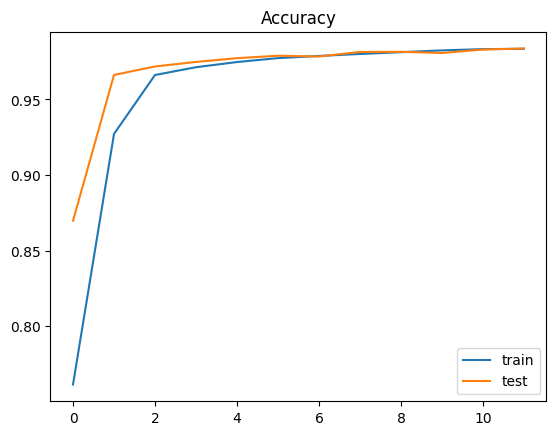

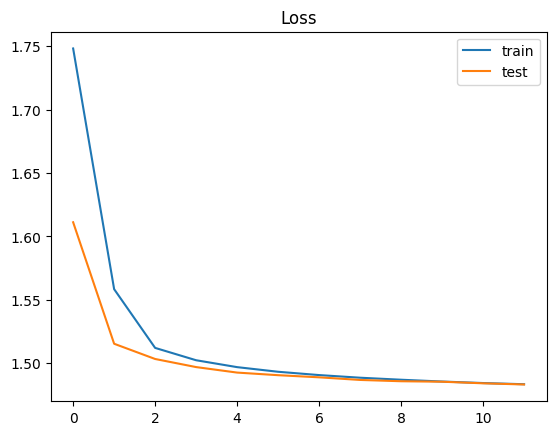

In [103]:
# plot accuracy
plt.title('Accuracy')
plt.plot(my_train_accuracies, label='train')
plt.plot(my_test_accuracies, label='test')
plt.legend()
plt.show()

# plot loss
plt.title('Loss')
plt.plot(my_train_losses, label='train')
plt.plot(my_test_losses, label='test')
plt.legend()
plt.show()

In [107]:
import os
# create directory for saving model and optimizer states
if not os.path.exists('model'):
    os.makedirs('model')

net_path = os.path.join('model', 'my_net.pth')
optimizer_path = os.path.join('model', 'my_optimizer.pth')

torch.save(my_net.state_dict(), net_path)
torch.save(my_optimizer.state_dict(), optimizer_path)

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


15. You can leave a feedback, if you want :)

OUTDATED: Unfortunately after trying multiple new-defined models and new optimizers I was unable to train a model to outperform the template model provided at the begining of the jupyter notebook (MLP model).

Update 28 June:
I was able to train my own defined network, which achieves the following statistics:
Train loss: 1.4835, Train accuracy: 0.9835
Test loss: 1.4833, Test accuracy: 0.9837
It is worth mentioning that these statistics were achieved with an early stop at epoch 12 due to the setting of the early_stopping_patience parameter, but it would probably be even better with subsequent epochs.

The previous problems were due to the lack of definition of a new optimizer for the new network and the previously defined optimizer for the previous network was used.

This line was missing (optimizer was used):

my_optimizer = torch.optim.SGD(my_net.parameters(), lr=0.01)

16. Send your results(notebook+weights) in a *.zip file by e-mail

or (preferred) send link to your's github (public) repository with your results.